## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
study_results.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset
# Display the data table for previews

merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
#merge_df.count()
mouse_count = merge_df["Mouse ID"].unique()
len(mouse_count)


249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# groupby_ID_count = merge_df.groupby(["Mouse ID", "Timepoint"]).count()
# #groupby_ID_count.valuecounts()
# groupby_ID_count


duplicate_mice_ID = merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
print(merge_df[merge_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)])

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merge_df.loc[merge_df["Mouse ID"] !="g989"]
cleaned_df

#cleaned_df.rename = cleaned_df(columns= {"Tumor Volume (mm3)": "Tumor Volume"})

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
number_of_mice =len(cleaned_df["Mouse ID"].unique())

number_of_mice



248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_regimen_df = cleaned_df.groupby("Drug Regimen")
drug_regimen_df.head()

#For each drug:
#drug_regimen_df.describe()

mean_tv = drug_regimen_df["Tumor Volume (mm3)"].mean()
median_tv = drug_regimen_df["Tumor Volume (mm3)"].median()
variance_tv = drug_regimen_df["Tumor Volume (mm3)"].var()
stdev_tv = drug_regimen_df["Tumor Volume (mm3)"].std()
sem_tv = drug_regimen_df["Tumor Volume (mm3)"].sem()

drug_summary = ({"Mean Tumor Volume": mean_tv,
                 "Median Tumor Volume": median_tv,
                  "Variance of Tumor Volume": variance_tv,
                  "Standard Deviation of Tumor Volume": stdev_tv,
                   "SEM of Tumor Volume": sem_tv})
                
drug_regimen_summary = pd.DataFrame(drug_summary)
drug_regimen_summary.head()

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen_df = cleaned_df.groupby("Drug Regimen")
drug_regimen_df.head()
# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_df.agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

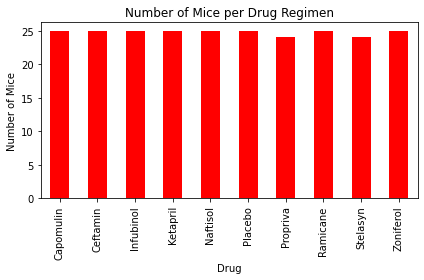

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
#total_mice_per_drug = drug_regimen_df["Drug Regimen"["Mouse ID"]].count()

# mice_and_drug = drug_regimen_df(len["Mouse ID"])
# mice_and_drug = mice_and_drug.set_index("Drug Regimen")
#mice_and_drug.head()

drug_regimen_summary["Number of Mice"]= drug_regimen_df["Mouse ID"].nunique()
drug_regimen_summary

mice_and_drug = drug_regimen_df["Mouse ID"].nunique()
mice_and_drug
mice_and_drug.plot(kind="bar", facecolor="red")
plt.title("Number of Mice per Drug Regimen")
plt.ylabel("Number of Mice")
plt.xlabel("Drug")
plt.tight_layout()

ValueError: too many values to unpack (expected 1)

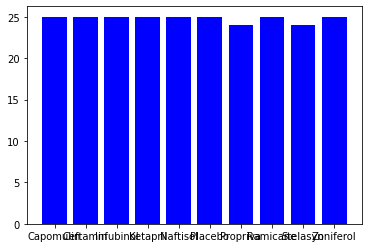

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drug_regimen_summary["Number of Mice"]= drug_regimen_df["Mouse ID"].nunique()
drug_regimen_summary
mice_and_drug = drug_regimen_df["Mouse ID"].nunique()
mice_and_drug
# drug = drug_regimen_df["Drug Regimen"]

drug = mice_and_drug.keys()

mice_and_drug_summary, = plt.bar(drug, mice_and_drug, color="blue", label="Mice" )
tick_locations = [value for value in x_axis]
plt.xticks(drug, rotation=90)
plt.title("Number of Mice per Drug Regiment")
plt.xlabel("Drug")
plt.ylabel("Number of Mice")

Text(0, 0.5, '')

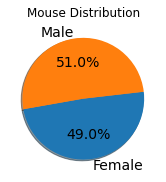

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(cleaned_df.groupby(["Sex"]).count()).reset_index()
gender_df.head()

#Alter the dataframe down to two columns
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df.head()

#gender_df.plot.pie(subplots = True, figsize = (8,4))
ax1 = plt.subplot(121, aspect="equal")
gender_df.plot(kind="pie", y = "Mouse ID", ax=ax1, autopct='%1.1f%%',
              startangle=190, shadow=True, labels=gender_df["Sex"], legend = False, fontsize=14)
plt.title("Mouse Distribution")
plt.xlabel("")
plt.ylabel("")


In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [15]:
drug_regimen_summary


,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume,Number of Mice
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,25
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,25
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,25
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,25
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,25
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,25
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332,24
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,25
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,24


In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#filtered_df = cleaned_df.loc[(cleaned_df["Drug Regimen"] == "Capomulin") | (cleaned_df["Drug Regimen"] == "Ramicane") | (cleaned_df["Drug Regimen"] == "Ceftamin") | (cleaned_df["Drug Regimen"] == "Propriva"), :]

last_timepoint_df = cleaned_df.sort_values("Timepoint", ascending = False)
last_timepoint_df = last_timepoint_df.drop_duplicates("Mouse ID", keep='first')
last_timepoint_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capomulin_df = last_timepoint_df[last_timepoint_df["Drug Regimen"]== "Capomulin"]
ramicane_df = last_timepoint_df[last_timepoint_df["Drug Regimen"]== "Ramicane"]
infubinol_df = last_timepoint_df[last_timepoint_df["Drug Regimen"]== "Infubinol"]
ceftamin_df = last_timepoint_df[last_timepoint_df["Drug Regimen"]== "Ceftamin"]
##Does timepoint have to be 45?? It just says greatest or last - that may be different for some mice?



In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
cap_vol_data = capomulin_df["Tumor Volume (mm3)"]     
quartiles = cap_vol_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of capomulin is: {lowerq}")
print(f"The upper quartile of capomulin is: {upperq}")
print(f"The interquartile range of capomulin is: {iqr}")
print(f"The median of capomulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")    

    

The lower quartile of capomulin is: 32.37735684
The upper quartile of capomulin is: 40.1592203
The interquartile range of capomulin is: 7.781863460000004
The median of capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [20]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
ram_vol_data = ramicane_df["Tumor Volume (mm3)"]
    
quartiles = ram_vol_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of ramicane is: {lowerq}")
print(f"The upper quartile of ramicane is: {upperq}")
print(f"The interquartile range of ramicane is: {iqr}")
print(f"The median of ramicane is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.") 

The lower quartile of ramicane is: 31.56046955
The upper quartile of ramicane is: 40.65900627
The interquartile range of ramicane is: 9.098536719999998
The median of ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [21]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
inf_vol_data = infubinol_df["Tumor Volume (mm3)"]
    
quartiles = inf_vol_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of infubinol is: {lowerq}")
print(f"The upper quartile of infubinol is: {upperq}")
print(f"The interquartile range of infubinol is: {iqr}")
print(f"The median of infubinol is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.") 

The lower quartile of infubinol is: 54.04860769
The upper quartile of infubinol is: 65.52574285
The interquartile range of infubinol is: 11.477135160000003
The median of infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [22]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
ceft_vol_data = ceftamin_df["Tumor Volume (mm3)"]
    
quartiles = ceft_vol_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of ceftamin is: {lowerq}")
print(f"The upper quartile of ceftamin is: {upperq}")
print(f"The interquartile range of ceftamin is: {iqr}")
print(f"The median of ceftamin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.") 

The lower quartile of ceftamin is: 48.72207785
The upper quartile of ceftamin is: 64.29983003
The interquartile range of ceftamin is: 15.577752179999997
The median of ceftamin is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


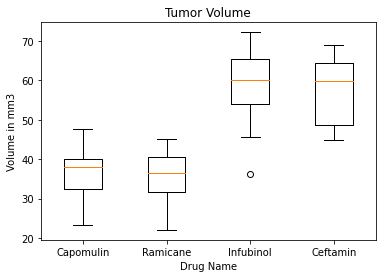

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_vol_data = [cap_vol_data, ram_vol_data, inf_vol_data, ceft_vol_data]

fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume")
ax1.set_xlabel("Drug Name")
ax1.set_ylabel("Volume in mm3")
ax1.boxplot(tumor_vol_data, labels = treatments)
plt.savefig("boxplot")
plt.show()

## Line and Scatter Plots

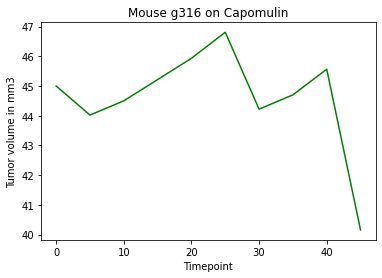

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_g316 = cleaned_df[cleaned_df["Mouse ID"]=="g316"]
g316_time = mouse_g316["Timepoint"]
g316_tumor = mouse_g316["Tumor Volume (mm3)"]

plt.title("Mouse g316 on Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor volume in mm3")
plt.show          

plt.plot(g316_time, g316_tumor, color="green", label="Mouse g316")

Text(0.5, 1.0, 'Mice on Capomulin')

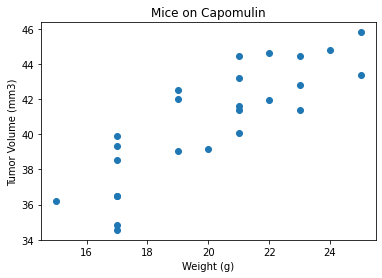

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_df2 = cleaned_df[cleaned_df["Drug Regimen"]== "Capomulin"]
capomulin_df2.head()

avg_group_cap = capomulin_df2.groupby("Mouse ID").mean()
avg_group_cap

mouse_weight = avg_group_cap["Weight (g)"]
avg_vol_cap = avg_group_cap["Tumor Volume (mm3)"]

plt.scatter(mouse_weight, avg_vol_cap)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mice on Capomulin")

## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
m_slope, m_int, m_r, m_p, m_std_err = stats.linregress(mouse_weight, avg_vol_cap)
vc_fit = vc_slope * year + vc_int


NameError: name 'stats' is not defined